In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.svm import SVC

In [2]:
data1=loadmat('ex6data1.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
x1=data1['X']
y1=data1['y']
x1.shape,y1.shape

((51, 2), (51, 1))

In [4]:
def plotData(X,Y):
    pos=(Y==1).flatten()
    neg=(Y==0).flatten()
    stparam=X[:,0]
    ndparam=X[:,1]
    plt.plot(stparam[pos],ndparam[pos],'+',color='black')
    plt.plot(stparam[neg],ndparam[neg],'o',color='yellow',markeredgecolor='black')
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])  #stacks 1d arrays along columns
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z,alpha=0.2)

    plotData(X, y)
    #plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')   #landmarks
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    print('Number of support vectors: ', svc.support_.size)

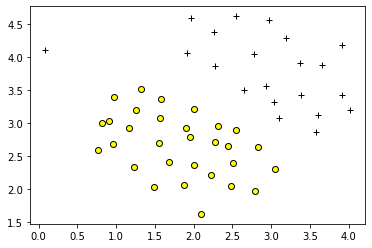

In [5]:
plotData(x1,y1)

Number of support vectors:  12


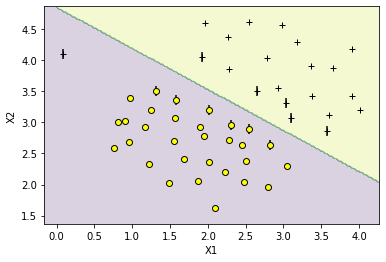

In [6]:
clf=SVC(C=1.0,kernel='linear')
clf.fit(x1,y1.flatten())  #fit SVM model according to given training data
plot_svc(clf,x1,y1)

Number of support vectors:  3


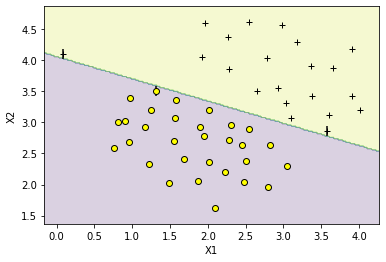

In [7]:
clf.set_params(C=100)
clf.fit(x1,y1.flatten())  #just separates the examples for large C,does not generalize well for new examples
plot_svc(clf,x1,y1)

In [8]:
def gaussianKernel(x1,x2,sigma=2):
    norm=((x1-x2).T).dot(x1-x2)
    return np.exp(-norm/(2*sigma**2))

In [9]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
gaussianKernel(x1, x2)

0.32465246735834974

In [10]:
data2=loadmat('ex6data2.mat')
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [11]:
x2=data2['X']
y2=data2['y']
x2.shape,y2.shape

((863, 2), (863, 1))

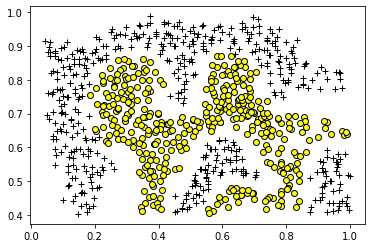

In [12]:
plotData(x2,y2)

Number of support vectors:  254


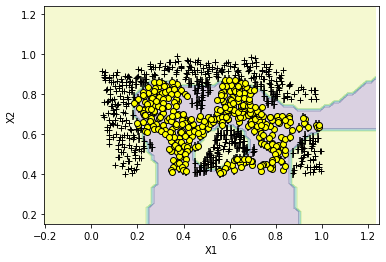

In [13]:
clf2=SVC(C=50,kernel='rbf',gamma=6)
clf2.fit(x2,y2.flatten())
plot_svc(clf2,x2,y2)

In [14]:
prediction=clf2.predict(x2)  #making predictions,x1=0.4,x2=0.3
prediction[y2.flatten()==prediction].shape

(809,)

In [15]:
clf2.predict([[-0.2,0.4]])  #prediction for an individual example

array([1], dtype=uint8)

In [16]:
data3=loadmat('ex6data3.mat')
x3=data3['X']
y3=data3['y']
xval3=data3['Xval']
yval3=data3['yval']
data3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

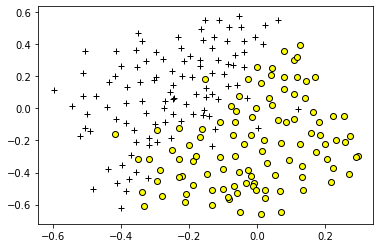

In [17]:
plotData(x3,y3)

In [18]:
def dataset3Params(x,y,xval,yval):
    vals=np.array([0.01,0.03,0.1,0.3,1,3,10,30])
    acc=0
    best_c=0
    best_gamma=0
    for i in vals:
        C=i
        for j in vals:
            gamma=1/j
            classifier=SVC(C=C,gamma=gamma,kernel='poly')
            classifier.fit(x,y.flatten())
            predict=classifier.predict(xval)
            score=classifier.score(xval,yval.flatten())
            if score>acc:
                acc=score
                best_c=C
                best_gamma=gamma
    return best_c,best_gamma

In [19]:
c3,gamma3=dataset3Params(x3,y3,xval3,yval3)
c3,gamma3

(0.03, 100.0)

Number of support vectors:  57


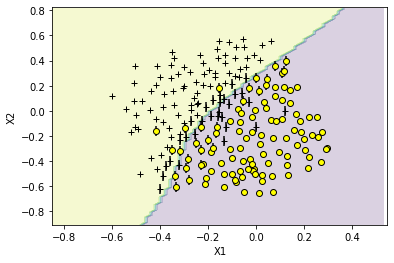

In [20]:
clf3=SVC(C=c3,gamma=gamma3,kernel='poly')
clf3.fit(x3,y3.flatten())
plot_svc(clf3,x3,y3)

In [21]:
import re
from nltk.stem import PorterStemmer

In [22]:
vocablist=pd.read_csv('vocab.txt',sep='\t')  #to read tab separated data in text files
vocablist

,0,1
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about
5,6,abov
6,7,absolut
7,8,abus
8,9,ac
9,10,accept


In [23]:
vocab_dict={}#dictionary for storing words as keys and index as keys
vocab_dict2={}
vocab_arr=vocablist.values
m=vocab_arr.shape[0]
for i in range(m):
    vocab_dict[vocab_arr[i,1]]=vocab_arr[i,0]
    vocab_dict2[vocab_arr[i,0]]=vocab_arr[i,1]

In [24]:
file_contents = open("emailSample1.txt","r").read()
file_contents

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n"

In [25]:
def processEmail(email_contents,vocablist_d):
    #lower case
    email_contents=email_contents.lower()
    #replace all number with the word "number"
    email_contents=re.sub("[0-9]+","number",email_contents)
    #replace all urls with the word "httpaddr
    email_contents=re.sub("[http|https]://[^\s]*","httpaddr",email_contents)
    #replace email addresses with "emailaddr"
    email_contents=re.sub("[\s]+@[\s]+","emailaddr",email_contents)
    #replace $ with "dollar"
    email_contents=re.sub("[$]+","dollar",email_contents)
    #replace all special characters with " ",i.e a whitespace
    specialChar = ["<","[","^",">","+","?","!","'",".",",",":"]
    for char in specialChar:
        email_contents=email_contents.replace(str(char)," ")
    email_contents=email_contents.replace("\n"," ")
    #stemmin
    ps=PorterStemmer()
    email_contents=[ps.stem(token) for token in email_contents.split(" ")]
    email_contents=" ".join(email_contents)
    word_indices=[]
    for char in email_contents.split(" "):
        if len(char)>=1 and char in vocablist_d.keys():
            word_indices.append(int(vocablist_d[char]))
    return np.array(word_indices)

In [26]:
word_index=processEmail(file_contents,vocab_dict)
word_index

array([  86,  916,  794, 1077,  883,  370, 1699,  790, 1822, 1831,  883,
        431, 1171,  794, 1002, 1893, 1364,  592, 1676,  238,  162,   89,
        688,  945, 1663, 1120, 1062, 1699,  375, 1162,  479, 1893, 1510,
       1182, 1237,  810, 1895, 1440, 1547,  181, 1699, 1758, 1896,  688,
       1676,  992,  961, 1477,   71,  530, 1699,  309])

In [27]:
len(vocab_dict)

1899

In [28]:
def emailFeatures(word_indices,vocablist_d):
    n=len(vocablist_d)
    features=np.zeros(n)
    features[word_indices]=1
    return features

In [29]:
emailFeatures(word_index,vocab_dict)

array([0., 0., 0., ..., 1., 0., 0.])

In [30]:
data4train=loadmat('spamTrain.mat')
data4test=loadmat('spamTest.mat')
data4train.keys(),data4test.keys()

(dict_keys(['__header__', '__version__', '__globals__', 'X', 'y']),
 dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest']))

In [31]:
x4train=data4train['X']
y4train=data4train['y']
x4test=data4test['Xtest']
y4test=data4test['ytest']
x4train.shape,y4train.shape,x4test.shape,y4test.shape

((4000, 1899), (4000, 1), (1000, 1899), (1000, 1))

In [32]:
spam_svc=SVC(C=0.1,kernel='linear')  #linear chosen because no of features is comparable with no of examples
spam_svc.fit(x4train,y4train.flatten())
spam_svc.score(x4train,y4train.flatten())

0.99825

In [33]:
spam_svc.score(x4test,y4test.flatten())  #accuracy in test set

0.989

In [34]:
weights=spam_svc.coef_ #.coef_ is an attribute which gives the weights assigned to the features(each word)
weights=np.array(weights)
weights

array([[ 0.00793208,  0.01563324,  0.05546492, ..., -0.08670606,
        -0.00661274,  0.06506632]])

In [35]:
we=weights[0]
we

array([ 0.00793208,  0.01563324,  0.05546492, ..., -0.08670606,
       -0.00661274,  0.06506632])

In [36]:
weight_dict={}
for i in range(1899):
    weight_dict[we[i]]=i+1
sor=np.sort(we)[::-1]
sor

array([ 0.50061374,  0.46591639,  0.42286912, ..., -0.42835516,
       -0.43807244, -0.60513164])

In [37]:
print("top predictors\n")
for i in range(15):
    ind=weight_dict[sor[i]]
    print(vocab_dict2[ind],"\t\t",sor[i])
print("\nThese words are most predictive of a spam email")

top predictors

our 		 0.5006137361746403
click 		 0.46591639068888796
remov 		 0.4228691170610412
guarante 		 0.3836216017940651
visit 		 0.367710398245535
basenumb 		 0.3450640979461706
dollar 		 0.3236320357963838
will 		 0.2697241060373996
price 		 0.2672977146177069
pleas 		 0.26116888670014904
most 		 0.2572981979518163
nbsp 		 0.2539414551595328
lo 		 0.25346652431419936
ga 		 0.2482969904556866
hour 		 0.24640435783158998

These words are most predictive of a spam email
